# 311 Cases

### References:
https://data.sfgov.org/City-Infrastructure/311-Cases/vw6y-z8j6


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from PIL import Image

from sklearn.model_selection import ShuffleSplit
% matplotlib inline

In [3]:
df = pd.read_csv('311_Cases.csv')

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Street,Supervisor District,Neighborhood,Police District,Latitude,Longitude,Point,Source,Media URL
0,10667600,03/31/2019 12:12:13 PM,03/31/2019 01:34:27 PM,03/31/2019 01:34:27 PM,Closed,Pickup completed.,Recology_Abandoned,Street and Sidewalk Cleaning,Bulky Items,Furniture,"333 RANDOLPH ST, SAN FRANCISCO, CA, 94132",RANDOLPH ST,11.0,Merced Heights,TARAVAL,37.714110,-122.465725,"(37.71411, -122.465725)",Mobile/Open311,http://mobile311.sfgov.org/reports/10667600/ph...
1,10667603,03/31/2019 12:13:58 PM,03/31/2019 12:38:53 PM,03/31/2019 12:38:53 PM,Closed,Pickup completed.,Recology_Abandoned,Street and Sidewalk Cleaning,Bulky Items,Mattress,"1509 GOLDEN GATE AVE, SAN FRANCISCO, CA, 94115",GOLDEN GATE AVE,5.0,Western Addition,NORTHERN,37.779110,-122.435754,"(37.77911015, -122.43575424)",Mobile/Open311,http://mobile311.sfgov.org/reports/10667603/ph...
2,10667604,03/31/2019 12:14:11 PM,03/31/2019 01:50:01 PM,03/31/2019 01:50:01 PM,Closed,Pickup completed.,Recology_Abandoned,Street and Sidewalk Cleaning,Bulky Items,Refrigerator,"15 STILLMAN ST, SAN FRANCISCO, CA, 94107",STILLMAN ST,6.0,South of Market,SOUTHERN,37.783115,-122.394470,"(37.78311539, -122.39447021)",Integrated Agency,NaN
3,10667606,03/31/2019 12:14:13 PM,NaN,03/31/2019 12:15:34 PM,Open,accepted,DPW Ops Queue,Graffiti,Graffiti on Building_other,Building_other - Not_Offensive,"413 10TH ST, SAN FRANCISCO, CA, 94103",10TH ST,6.0,South of Market,SOUTHERN,37.771385,-122.410767,"(37.77138519, -122.4107666)",Integrated Agency,NaN
4,10667609,03/31/2019 12:15:00 PM,03/31/2019 01:38:00 PM,03/31/2019 01:38:00 PM,Closed,NaN,DPW Ops Queue,Street and Sidewalk Cleaning,Hazardous Materials,Liquids - Oil/Paint/Other,"1382 ALABAMA ST, SAN FRANCISCO, CA, 94110",ALABAMA ST,9.0,Mission,MISSION,37.749758,-122.410936,"(37.749758, -122.410936)",Mobile/Open311,NaN


In [5]:
df['Opened'] = pd.to_datetime(df['Opened'])
df['year'] = df['Opened'].dt.year
df['month'] = df['Opened'].dt.month

In [6]:
columns = list(df.columns)
columns = [column.lower().replace(' ', '_') for column in columns]
df.columns = columns

In [9]:
# Limit 
df = df.loc[(df['media_url'].isna() != True) &
            ((df['year'] == 2017) | (df['year'] == 2018))]

In [11]:
groups_m = df.groupby(['year', 'month']).count()
groups_m

caseid  opened  closed  updated  status  status_notes  \
year month                                                          
2017 1       16078   16078   15947    16078   16078         10323   
     2       13642   13642   13507    13642   13642          8559   
     3       15272   15272   14987    15272   15272          9928   
     4       14505   14505   14299    14505   14505          9459   
     5       15040   15040   14725    15040   15040          9863   
     6       16700   16700   16364    16700   16700         10568   
     7       16652   16652   16270    16652   16652          9940   
     8       18887   18887   18378    18887   18887         10882   
     9       17994   17994   17468    17994   17994         11111   
     10      17450   17450   17165    17450   17450         10614   
     11      16312   16312   16079    16312   16312         10423   
     12      14147   14147   13942    14147   14147          9003   
2018 1       19677   19677   19340    19677   19677         12882   
     2       17395   17395   17086    17395   17395         11250   
     3       17318   17318   16903    17318   17318         11325   
     4       21892   21892   21295    21892   21892         15033   
     5       24731   24731   24260    24731   24731         16745   
     6       22611   22611   22162    22611   22611         15460   
     7       23317   23317   22880    23317   23317         15470   
     8       24284   24284   23887    24284   24284         15676   
     9       22770   22770   22416    22770   22770         15147   
     10      25410   25410   24962    25410   25410         16868   
     11      22143   22143   21579    22143   22143         14944   
     12      20927   20927   20376    20927   20927         13945   

            responsible_agency  category  request_type  request_details  \
year month                                                                
2017 1                   16078     16078         16078            15830   
     2                   13642     13642         13642            13449   
     3                   15272     15272         15272            15055   
     4                   14505     14505         14505            14287   
     5                   15040     15040         15040            14821   
     6                   16700     16700         16700            16465   
     7                   16652     16652         16652            16407   
     8                   18887     18887         18887            18519   
     9                   17994     17994         17994            17690   
     10                  17450     17450         17450            17080   
     11                  16312     16312         16312            15981   
     12                  14147     14147         14147            13907   
2018 1                   19677     19677         19677            19418   
     2                   17395     17395         17395            17121   
     3                   17318     17318         17318            17021   
     4                   21892     21892         21892            21533   
     5                   24731     24731         24731            24321   
     6                   22611     22611         22611            22135   
     7                   23317     23317         23317            22793   
     8                   24284     24284         24284            23757   
     9                   22770     22770         22770            22222   
     10                  25410     25410         25410            24791   
     11                  22143     22143         22143            21692   
     12                  20927     20927         20927            20594   

            address  street  supervisor_district  neighborhood  \
year month                                                       
2017 1        16078   15783                16077         16022   
     2        13642   13399                13641         13607   
  

In [19]:
ss = ShuffleSplit(n_splits=1, train_size=120000, random_state=0)

for train_index, test_index in ss.split(df):
    train_index = train_index

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1678: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [25]:
groups_small = df.iloc[train_index].groupby(['year', 'month'])['caseid'].count()
print(groups_small)

year  month
2017  1        4226
      2        3588
      3        4089
      4        3733
      5        4005
      6        4358
      7        4356
      8        5023
      9        4739
      10       4585
      11       4365
      12       3778
2018  1        5166
      2        4555
      3        4662
      4        5770
      5        6483
      6        5987
      7        5988
      8        6453
      9        6015
      10       6825
      11       5818
      12       5433
Name: caseid, dtype: int64


In [55]:
# Size of thumbnail image
size = (128, 128)

def get_image(df):
    try: 
        response = requests.get(df['media_url'], stream=True)
        response.raw.decode_content = True
        with Image.open(response.raw) as image:
            width, height = image.size
            # print(width, height)
            # Crop down to 80% of size
            image = image.crop(box=(width*.10, height*.10, width*.90, height*.90))
            # Convert grayscale
            image = image.convert('L')
            image = image.resize(size)
            #image.show()
            np_im = np.array(image)
            #print(np_im)
            return np_im
    except:
        return np.nan

In [27]:
df['image'] = np.nan

In [53]:
image1 = get_image(df.iloc[0])

1147 1536


In [33]:
image1

nan

## Data Selection
- Due to computational constraints, selecting 120,000 images from 2017 and 2018

In [56]:
df_mini = df.iloc[0:20]

df_mini.image = df_mini.apply(get_image, axis=1)

df_mini.head()

/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,caseid,opened,closed,updated,status,status_notes,responsible_agency,category,request_type,request_details,...,neighborhood,police_district,latitude,longitude,point,source,media_url,year,month,image
96,9816899,2018-11-16 11:42:48,11/16/2018 07:23:24 PM,11/16/2018 07:23:24 PM,Closed,WASTE NOT FOUND,Recology_Abandoned,Street and Sidewalk Cleaning,Bulky Items,Boxed or Bagged Items,...,Downtown / Union Square,CENTRAL,37.789575,-122.403933,"(37.78957467, -122.40393299)",Mobile/Open311,http://mobile311.sfgov.org/reports/9816899/photos,2018,11,"[[179, 196, 203, 197, 209, 252, 252, 252, 251,..."
232,9816265,2018-11-16 09:53:00,11/16/2018 02:08:00 PM,11/16/2018 02:08:00 PM,Closed,NaN,DPW Ops Queue,Street and Sidewalk Cleaning,General Cleaning,Other Loose Garbage,...,Outer Mission,INGLESIDE,37.713445,-122.450216,"(37.71344532, -122.45021576)",Mobile/Open311,http://mobile311.sfgov.org/reports/9816265/photos,2018,11,"[[131, 148, 115, 140, 134, 147, 152, 137, 151,..."
246,9816229,2018-11-16 09:47:06,11/16/2018 02:21:53 PM,11/16/2018 02:21:53 PM,Closed,Pickup completed.,Recology_Abandoned,Street and Sidewalk Cleaning,Bulky Items,Boxed or Bagged Items,...,Outer Mission,INGLESIDE,37.712290,-122.451420,"(37.71229029, -122.45142032)",Mobile/Open311,http://mobile311.sfgov.org/reports/9816229/photos,2018,11,"[[213, 216, 206, 207, 190, 175, 163, 146, 143,..."
251,6929878,2017-03-12 16:48:35,03/16/2017 12:27:23 AM,03/16/2017 12:27:23 AM,Closed,DPW does not move homeless encampments...Advis...,DPW Ops Queue,Encampments,Encampment Reports,Encampment Cleanup,...,Eureka Valley,MISSION,37.759373,-122.433769,"(37.75937271, -122.43376923)",Mobile/Open311,http://mobile311.sfgov.org/reports/6929878/photos,2017,3,"[[58, 57, 25, 16, 43, 215, 80, 55, 130, 127, 1..."
255,6929871,2017-03-12 16:45:46,03/16/2017 12:26:29 AM,03/16/2017 12:26:29 AM,Closed,DPW does not move homeless encampments...Advis...,DPW Ops Queue,Encampments,Encampment Reports,Encampment Cleanup,...,Castro,MISSION,37.762329,-122.436165,"(37.7623291, -122.43616486)",Mobile/Open311,http://mobile311.sfgov.org/reports/6929871/photos,2017,3,"[[24, 49, 68, 180, 184, 185, 188, 183, 192, 15..."


In [61]:
# Confirm image size
df_mini.iloc[0].image.shape

(128, 128)

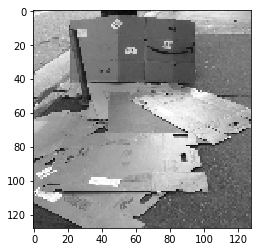

In [67]:
# Confirm an image
plt.imshow(df_mini.iloc[0].image, cmap='gray')

### Check code before trying large scale

In [76]:
chunksize = 10
folder = 'bw_pickles/'
for i in range(0, df_mini.shape[0], chunksize):
    chunk = df_mini.iloc[i:min((i+chunksize), df_mini.shape[0])]
    try:
        filename = folder + 'bw_mini' + str(i) + '.gzde'
        chunk.to_pickle(filename, compression='gzip')
    except:
        print(str(i) + 'failed')

In [77]:
df_test = pd.read_pickle('bw_pickles/bw_0_mini.gzde', compression='gzip')

In [78]:
chunksize = 1000
folder = 'bw_pickles/'
for i in range(0, df.shape[0], chunksize):
    chunk = df_mini.iloc[i:min((i+chunksize), df_mini.shape[0])]
    try:
        filename = folder + 'bw_' + str(i) + '.gzde'
        chunk.to_pickle(filename, compression='gzip')
    except:
        print(str(i) + 'failed')

,caseid,opened,closed,updated,status,status_notes,responsible_agency,category,request_type,request_details,...,neighborhood,police_district,latitude,longitude,point,source,media_url,year,month,image
96,9816899,2018-11-16 11:42:48,11/16/2018 07:23:24 PM,11/16/2018 07:23:24 PM,Closed,WASTE NOT FOUND,Recology_Abandoned,Street and Sidewalk Cleaning,Bulky Items,Boxed or Bagged Items,...,Downtown / Union Square,CENTRAL,37.789575,-122.403933,"(37.78957467, -122.40393299)",Mobile/Open311,http://mobile311.sfgov.org/reports/9816899/photos,2018,11,"[[179, 196, 203, 197, 209, 252, 252, 252, 251,..."
232,9816265,2018-11-16 09:53:00,11/16/2018 02:08:00 PM,11/16/2018 02:08:00 PM,Closed,NaN,DPW Ops Queue,Street and Sidewalk Cleaning,General Cleaning,Other Loose Garbage,...,Outer Mission,INGLESIDE,37.713445,-122.450216,"(37.71344532, -122.45021576)",Mobile/Open311,http://mobile311.sfgov.org/reports/9816265/photos,2018,11,"[[131, 148, 115, 140, 134, 147, 152, 137, 151,..."
246,9816229,2018-11-16 09:47:06,11/16/2018 02:21:53 PM,11/16/2018 02:21:53 PM,Closed,Pickup completed.,Recology_Abandoned,Street and Sidewalk Cleaning,Bulky Items,Boxed or Bagged Items,...,Outer Mission,INGLESIDE,37.712290,-122.451420,"(37.71229029, -122.45142032)",Mobile/Open311,http://mobile311.sfgov.org/reports/9816229/photos,2018,11,"[[213, 216, 206, 207, 190, 175, 163, 146, 143,..."
251,6929878,2017-03-12 16:48:35,03/16/2017 12:27:23 AM,03/16/2017 12:27:23 AM,Closed,DPW does not move homeless encampments...Advis...,DPW Ops Queue,Encampments,Encampment Reports,Encampment Cleanup,...,Eureka Valley,MISSION,37.759373,-122.433769,"(37.75937271, -122.43376923)",Mobile/Open311,http://mobile311.sfgov.org/reports/6929878/photos,2017,3,"[[58, 57, 25, 16, 43, 215, 80, 55, 130, 127, 1..."
255,6929871,2017-03-12 16:45:46,03/16/2017 12:26:29 AM,03/16/2017 12:26:29 AM,Closed,DPW does not move homeless encampments...Advis...,DPW Ops Queue,Encampments,Encampment Reports,Encampment Cleanup,...,Castro,MISSION,37.762329,-122.436165,"(37.7623291, -122.43616486)",Mobile/Open311,http://mobile311.sfgov.org/reports/6929871/photos,2017,3,"[[24, 49, 68, 180, 184, 185, 188, 183, 192, 15..."
257,6929866,2017-03-12 16:43:10,03/13/2017 11:55:12 AM,03/13/2017 11:55:12 AM,Closed,Pickup completed.,Recology_Abandoned,Street and Sidewalk Cleaning,Bulky Items,Electronics,...,Outer Sunset,TARAVAL,37.740013,-122.504448,"(37.74001312, -122.50444794)",Mobile/Open311,http://mobile311.sfgov.org/reports/6929866/photos,2017,3,"[[209, 190, 209, 208, 213, 211, 210, 210, 212,..."
258,6929865,2017-03-12 16:42:20,03/20/2017 10:30:02 PM,03/20/2017 10:30:02 PM,Closed,Per process - cases are closed 5 days after as...,311 Service Request Queue - Hold,Graffiti,Graffiti on Other_enter_additional_details_below,Other_enter_additional_details_below - Offensive,...,Lincoln Park / Ft. Miley,RICHMOND,37.778309,-122.513687,"(37.77830887, -122.51368713)",Mobile/Open311,http://mobile311.sfgov.org/reports/6929865/photos,2017,3,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
273,9816174,2018-11-16 09:37:00,11/16/2018 10:07:00 AM,11/16/2018 10:07:00 AM,Closed,"POSSIBLE BROKEN IRRIGATION IN LANDSCAPED AREA,...",PUC - Water - G,Sewer Issues,Water_leak,Other,...,South of Market,SOUTHERN,37.782036,-122.396288,"(37.78203628, -122.39628802)",Mobile/Open311,http://mobile311.sfgov.org/reports/9816174/photos,2018,11,"[[172, 167, 166, 156, 164, 167, 145, 100, 72, ..."
283,9816142,2018-11-16 09:34:00,11/19/2018 09:35:00 AM,11/19/2018 09:35:00 AM,Closed,NaN,DPW Ops Queue,Street and Sidewalk Cleaning,General Cleaning,Other Loose Garbage,...,Cole Valley,PARK,37.767473,-122.452240,"(37.767473, -122.45224)",Mobile/Open311,http://mobile311.sfgov.org/reports/9816142/photos,2018,11,"[[156, 156, 162, 162, 162, 162, 159, 166, 165,..."
284,9816145,2018-11-16 09:34:59,11/16/2018 03:06:30 PM,11/16/2018 03:06:30 PM,Closed,Pickup completed.,Recology_Abandoned,Street and Sidewalk Cleaning,Bulky Items,Furniture,...,Cole Valley,PARK,37.767445,-122.452179,"(37.76

In [82]:

df.iloc[train_index].shape[0]

120000